In [1]:
from selenium.webdriver.common.by import By
from selenium import webdriver
import time

In [2]:
def get_driver():
  my_user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36"
  chrome_options = webdriver.ChromeOptions()
#   chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  chrome_options.add_argument(f"--user-agent={my_user_agent}")
  driver = webdriver.Chrome(options=chrome_options)
  return driver

In [3]:
url = 'https://www.timeshighereducation.com/world-university-rankings/2024/world-ranking#!/length/100/sort_by/rank/sort_order/asc/cols/stats'
# Call the above function to create a web driver
driver = get_driver()

# Load the webpage
driver.get(url)
time.sleep(1)

try:
    cookie_banner = driver.find_element(By.XPATH, '//*[@id="cookiebanner"]')
    display_prop = cookie_banner.value_of_css_property('display')
    if display_prop != 'none':
        cookie_banner.find_element(By.XPATH, '//*[@id="cookiebanner-accept-button"]').click()
        time.sleep(1)
except:
    pass




In [4]:
#rank table of top 25 universities
rank_table = driver.find_element(By.XPATH, '//*[@id="datatable-1"]')
rank_table_rows = rank_table.find_elements(By.CSS_SELECTOR, "tbody tr")

uni = {}

for row in rank_table_rows:
    nid = row.get_attribute('data-nid')
    rank = row.find_element(By.CSS_SELECTOR, "td:nth-child(1)").text
    name_country_el = row.find_element(By.CSS_SELECTOR, "td:nth-child(2)")
    name = name_country_el.find_element(By.CSS_SELECTOR, ".ranking-institution-title").text
    country = name_country_el.find_element(By.CSS_SELECTOR, ".location").text
    fte_students = row.find_element(By.CSS_SELECTOR, "td:nth-child(3)").text
    stud_per_staff = row.find_element(By.CSS_SELECTOR, "td:nth-child(4)").text
    international = row.find_element(By.CSS_SELECTOR, "td:nth-child(5)").text
    gender_ratio = row.find_element(By.CSS_SELECTOR, "td:nth-child(6)").text
    interdiscip = row.find_element(By.CSS_SELECTOR, "td:nth-child(7)").text
    uni[nid] = {}
    uni[nid]['rank'] = rank
    uni[nid]['name'] = name
    uni[nid]['country'] = country
    uni[nid]['fte_students'] = fte_students
    uni[nid]['stud_per_staff'] = stud_per_staff
    uni[nid]['international'] = international
    uni[nid]['gender_ratio'] = gender_ratio
    uni[nid]['interdiscip'] = interdiscip

In [5]:
#score table of top 25 universities
driver.find_element(By.XPATH, '//*[@id="block-system-main"]/div/div[3]/div/div[1]/div[1]/div/div[1]/ul/li[2]/label').click()
time.sleep(1)

for row in rank_table_rows:
    nid = row.get_attribute('data-nid')
    overall_score = row.find_element(By.CSS_SELECTOR, "td:nth-child(3)").text
    teaching = row.find_element(By.CSS_SELECTOR, "td:nth-child(4)").text
    research_env = row.find_element(By.CSS_SELECTOR, "td:nth-child(5)").text
    research_qual = row.find_element(By.CSS_SELECTOR, "td:nth-child(6)").text
    industry = row.find_element(By.CSS_SELECTOR, "td:nth-child(7)").text
    international_outlook = row.find_element(By.CSS_SELECTOR, "td:nth-child(8)").text
    uni[nid]['overall_score'] = overall_score
    uni[nid]['teaching'] = teaching
    uni[nid]['research_env'] = research_env
    uni[nid]['research_qual'] = research_qual
    uni[nid]['industry'] = industry
    uni[nid]['international_outlook'] = international_outlook

In [6]:
print(uni)

{'468': {'rank': '1', 'name': 'University of Oxford', 'country': 'United Kingdom', 'fte_students': '21,750', 'stud_per_staff': '10.9', 'international': '42%', 'gender_ratio': '49 : 51', 'interdiscip': '23%', 'overall_score': '98.5', 'teaching': '96.6', 'research_env': '100.0', 'research_qual': '99.0', 'industry': '98.7', 'international_outlook': '97.5'}, '467': {'rank': '2', 'name': 'Stanford University', 'country': 'United States', 'fte_students': '14,517', 'stud_per_staff': '6.4', 'international': '23%', 'gender_ratio': '47 : 53', 'interdiscip': '22%', 'overall_score': '98.0', 'teaching': '99.0', 'research_env': '97.8', 'research_qual': '99.6', 'industry': '100.0', 'international_outlook': '87.0'}, '471': {'rank': '3', 'name': 'Massachusetts Institute of Technology', 'country': 'United States', 'fte_students': '11,085', 'stud_per_staff': '8.0', 'international': '33%', 'gender_ratio': '41 : 59', 'interdiscip': '40%', 'overall_score': '97.9', 'teaching': '98.6', 'research_env': '96.2',

In [7]:
driver.quit()

In [8]:
import pandas as pd

In [9]:
uni_list = []
for u in uni:
    tmp_dict = {}
    tmp_dict['nid'] = u
    for v in uni[u]:
        tmp_dict[v] = uni[u][v]
    uni_list.append(tmp_dict)
    
df = pd.DataFrame(uni_list)

In [10]:
df

,nid,rank,name,country,fte_students,stud_per_staff,international,gender_ratio,interdiscip,overall_score,teaching,research_env,research_qual,industry,international_outlook
0,468,1,University of Oxford,United Kingdom,"21,750",10.9,42%,49 : 51,23%,98.5,96.6,100.0,99.0,98.7,97.5
1,467,2,Stanford University,United States,"14,517",6.4,23%,47 : 53,22%,98.0,99.0,97.8,99.6,100.0,87.0
2,471,3,Massachusetts Institute of Technology,United States,"11,085",8.0,33%,41 : 59,40%,97.9,98.6,96.2,99.7,100.0,93.8
3,466,4,Harvard University,United States,"20,050",9.0,25%,51 : 49,12%,97.8,97.7,99.9,99.4,84.2,90.8
4,470,5,University of Cambridge,United Kingdom,"20,565",11.5,38%,48 : 52,27%,97.5,95.8,100.0,98.0,87.9,97.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,652,=95,University of Tübingen,Germany,"21,632",27.1,14%,59 : 41,21%,67.0,49.1,56.5,89.0,99.8,72.0
96,651,=97,KTH Royal Institute of Technology,Sweden,"13,269",15.9,26%,34 : 66,46%,66.9,53.5,57.8,81.0,97.7,82.5
97,593,=97,University of Southampton,United Kingdom,"19,920",13.0,35%,51 : 49,32%,66.9,48.9,50.1,92.7,73.1,96.5
98,621,=99,Erasmus University Rotterdam,Netherlands,"33,874",36.0,25%,54 : 46,10%,66.7,38.5,54.1,96.9,94.7,90.6


In [11]:
# check for missing values
df.isna().any()

nid                      False
rank                     False
name                     False
country                  False
fte_students             False
stud_per_staff           False
international            False
gender_ratio             False
interdiscip              False
overall_score            False
teaching                 False
research_env             False
research_qual            False
industry                 False
international_outlook    False
dtype: bool

In [12]:
# check type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   nid                    100 non-null    object
 1   rank                   100 non-null    object
 2   name                   100 non-null    object
 3   country                100 non-null    object
 4   fte_students           100 non-null    object
 5   stud_per_staff         100 non-null    object
 6   international          100 non-null    object
 7   gender_ratio           100 non-null    object
 8   interdiscip            100 non-null    object
 9   overall_score          100 non-null    object
 10  teaching               100 non-null    object
 11  research_env           100 non-null    object
 12  research_qual          100 non-null    object
 13  industry               100 non-null    object
 14  international_outlook  100 non-null    object
dtypes: object(15)
memory usa

In [13]:
# changing some columns in object to float 
df['stud_per_staff'] = df['stud_per_staff'].astype(float)
df['overall_score'] = df['overall_score'].astype(float)
df['teaching'] = df['teaching'].astype(float)
df['research_env'] = df['research_env'].astype(float)
df['research_qual'] = df['research_qual'].astype(float)

In [14]:
# changing some columns in object with % to float
df['interdiscip'] = df['interdiscip'].apply(lambda x: x.replace('%', '')).astype(float) / 100.0
print(df['interdiscip'])

0     0.23
1     0.22
2     0.40
3     0.12
4     0.27
      ... 
95    0.21
96    0.46
97    0.32
98    0.10
99    0.22
Name: interdiscip, Length: 100, dtype: float64


In [15]:
# countries with top 100 universities
df['country'].unique()

array(['United Kingdom', 'United States', 'Switzerland', 'China',
       'Singapore', 'Canada', 'Japan', 'Germany', 'Hong Kong',
       'Australia', 'France', 'Belgium', 'Netherlands', 'Sweden',
       'South Korea', 'Russian Federation'], dtype=object)

In [16]:
# number of top 100 universities in different countries
df['country'].value_counts()

country
United States         36
United Kingdom        11
Germany                8
China                  7
Australia              6
Netherlands            6
Hong Kong              5
France                 4
Switzerland            3
Canada                 3
South Korea            3
Singapore              2
Japan                  2
Sweden                 2
Belgium                1
Russian Federation     1
Name: count, dtype: int64

<Axes: title={'center': 'Number of university in each country'}>

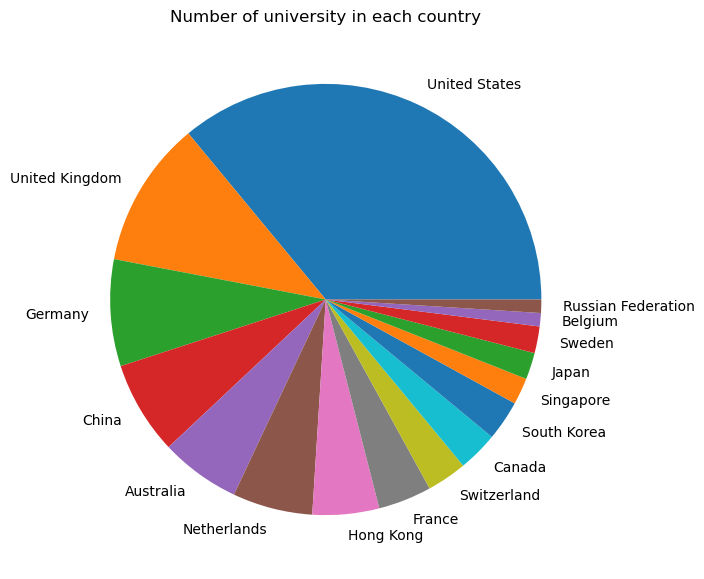

In [17]:
df['country'].value_counts().plot(kind='pie', title='Number of university in each country',figsize=(7,7), ylabel='')

In [18]:
# mean of the overall score for top 100 universities
df['overall_score'].mean()

78.443

In [19]:
df.groupby('country')['overall_score'].mean()

country
Australia             73.616667
Belgium               77.000000
Canada                80.866667
China                 80.014286
France                73.675000
Germany               72.050000
Hong Kong             73.240000
Japan                 79.050000
Netherlands           71.633333
Russian Federation    67.000000
Singapore             86.150000
South Korea           71.000000
Sweden                71.400000
Switzerland           81.466667
United Kingdom        81.636364
United States         82.227778
Name: overall_score, dtype: float64

<Axes: title={'center': 'Mean score in each country'}, xlabel='country'>

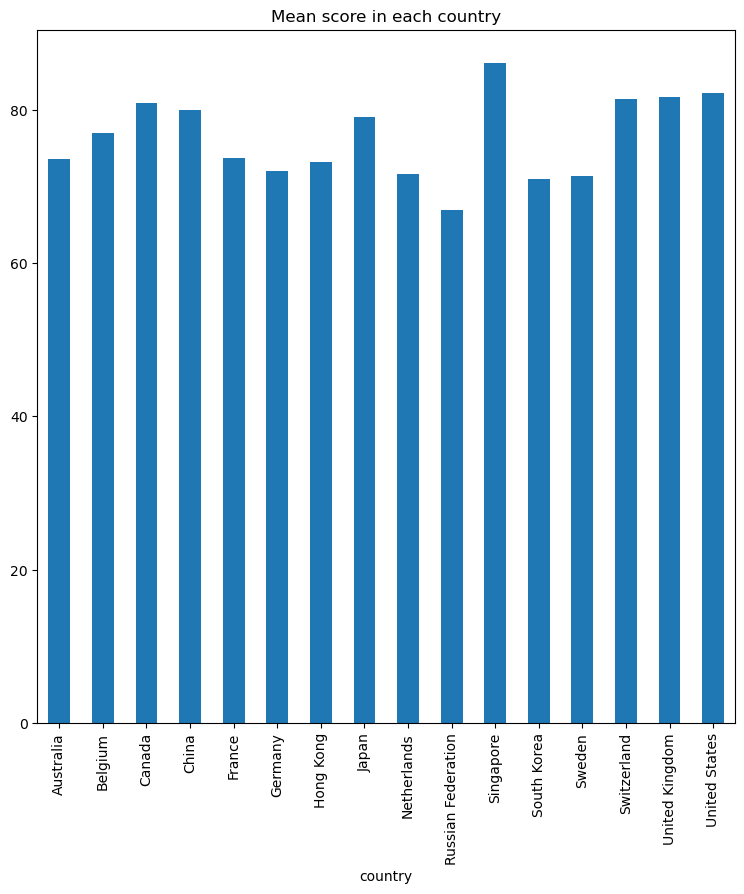

In [20]:
# plot the mean overall score of each country
df.groupby('country')['overall_score'].mean().plot(kind='bar', title='Mean score in each country',figsize=(9,9))

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# correlation between number of student per staff & overall score on teaching
print(df['stud_per_staff'].corr(df['teaching']))

-0.5192052676282426


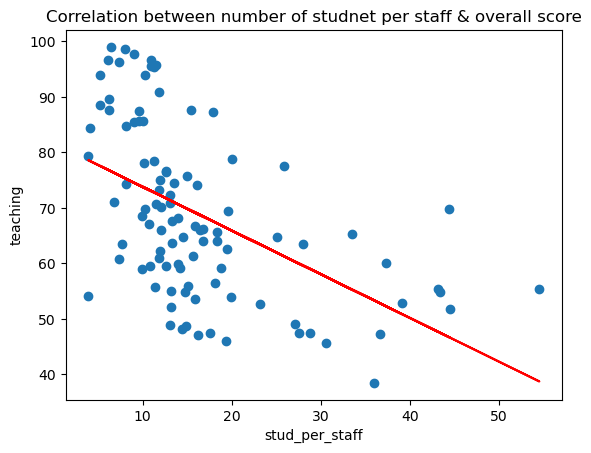

In [23]:
# plotting the correlation between number of student per staff & overall score
plt.scatter(df['stud_per_staff'], df['teaching'])
x = df['stud_per_staff']
y = df['teaching']
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
plt.plot(x, line(x), color='red', label='Line of Best Fit')
plt.xlabel('stud_per_staff')
plt.ylabel('teaching')
plt.title('Correlation between number of studnet per staff & overall score')
plt.show()

In [24]:
# correlation between research variables & overall score
print(df['interdiscip'].corr(df['overall_score']))
print(df['research_env'].corr(df['overall_score']))
print(df['research_qual'].corr(df['overall_score']))

0.05598789677888597
0.9406732078846566
0.4068385071310263
